<a href="https://colab.research.google.com/github/ferdianpradana/ferdianpradana-Penerapan-K-Means-Clustering-pada-ulasan-aplikasi-shopee/blob/main/Shope_Riview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muliasijabat/dataset-shoppe-id")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dataset-shoppe-id


In [ ]:
# Memberi alamat file
dataset_path = "/kaggle/input/dataset-shoppe-id/Shopee_IDN_PlayStore.xlsx"
df = pd.read_excel(dataset_path)

In [ ]:
# Melihat apakah dataset terbaca
print(df.columns)

# menampilkan 10 baris untuk cek
df.head(10)

Index(['content'], dtype='object')


,content
0,"Shopee bikin kecewa, puluhan paket ku kandas d..."
1,"Sebelum diupdate aplikasi berjalan normal,tapi..."
2,Buat yang suka belanja bisa manfaatkan shoope ...
3,"Jaringan bagus & stabil sampai 25Mbps, hp juga..."
4,Habis di-update malah makin parah. Jaringan da...
5,"Aplikasi semakin lemot, jaringan bagus dengan ..."
6,Maaf saya rubah dulu bintangnya dari 5 ke 2. K...
7,Saya menunggu pesanan saya setengah bulan lebi...
8,Shopee dari dulu ngga ada perubahan sama sekal...
9,Di bandingin online shop yg lain saya lebih me...


In [ ]:
# 4. Ambil Kolom content dan tidak ada nilai NaN
sentences = df['content'].dropna()
print("Jumlah baris dan kolom:", sentences.shape)





Jumlah baris dan kolom: (1000,)


In [ ]:
# 5. TF-IDF Vectorization

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_documents = vectorizer.fit_transform(sentences)

print(vectorized_documents)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35284 stored elements and shape (1000, 5028)>
  Coords	Values
  (0, 4229)	0.058196516543569506
  (0, 712)	0.12578294541136661
  (0, 2065)	0.22298136602748198
  (0, 3778)	0.20518400349540925
  (0, 3369)	0.10917643674302818
  (0, 2347)	0.17444861934011247
  (0, 1987)	0.24203504820790955
  (0, 1151)	0.24203504820790955
  (0, 4428)	0.16516821176689572
  (0, 2491)	0.14800118402523102
  (0, 4132)	0.17444861934011247
  (0, 2465)	0.09381270034691808
  (0, 994)	0.0990508413460291
  (0, 1466)	0.15119819878080387
  (0, 4517)	0.07521500860798455
  (0, 535)	0.25156589082273323
  (0, 1938)	0.08243983354731851
  (0, 3941)	0.10761600346381739
  (0, 3353)	0.07994372863101726
  (0, 1400)	0.10227148644174057
  (0, 270)	0.24203504820790955
  (0, 3919)	0.12091306657293088
  (0, 4080)	0.10124718497711249
  (0, 1953)	0.20518400349540925
  (0, 3708)	0.17444861934011247
  :	:
  (999, 1000)	0.26178911693281837
  (999, 478)	0.11523197831868313
  (999,

In [ ]:
# 6. Reduksi Dimensi untuk Visualisasi
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())


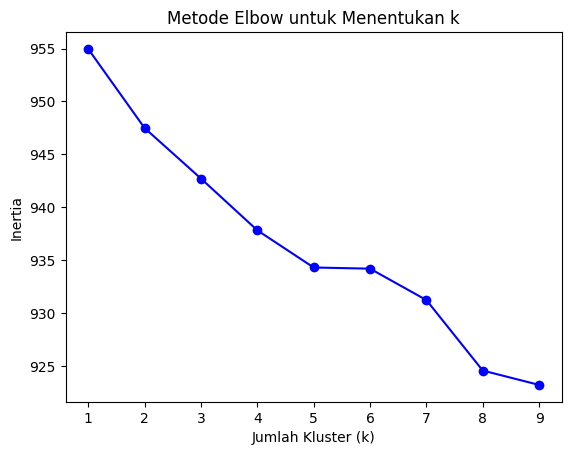

In [ ]:
# elbow untuk menentukan klusternya berapa, namun tetap memperhatikan hasilnya apakah sesuai atau tidak
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(vectorized_documents)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k')
plt.show()


In [ ]:
# 7. K-Means Clustering
num_clusters = 3  #jumlah cluster dapat di ubah
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=3, n_init=5, random_state=42)

In [ ]:
import textwrap
import pandas as pd

results = pd.DataFrame()
results['content'] = sentences.values
results['cluster'] = kmeans.labels_

# Iterasi setiap kluster dan bungkus teks panjang
for cluster_id in set(results['cluster']):
    print(f"Kluster {cluster_id}:")
    cluster_data = results[results['cluster'] == cluster_id]
    for index, row in cluster_data.head(5).iterrows():  # Tampilkan 20 baris pertama per kluster
        wrapped_text = textwrap.fill(row['content'], width=120)  # Lebar teks diperluas, misalnya 80 karakter
        print(wrapped_text+"\n")
    print("\n")  # Tambahkan baris kosong untuk memisahkan kluster

Kluster 0:
Sebelum diupdate aplikasi berjalan normal,tapi setelah diupdate malah blank,metode pembayaran tdk bisa diubah,tdk bisa
ubah alamat pengiriman,loading lama banget padahal jaringan normal kadang tdk bisa buka,,di suruh periksa koneksi !!

Jaringan bagus & stabil sampai 25Mbps, hp juga model terbaru. Menurut saya udah Flagship. RAM masih banyak, sama memori
internal juga masih 120 GB. Tapi, aplikasinya shopee lemot. Saya, kira cuma saya sendiri ternyata yg lain sama. Saya
bandingkan dengan Tokopedia ternyata lebih cepat Tokopedia. Harusnya klo jaringan keduanya lemot, ini cuma Shopee saja
yang lemot. Tolong, perbaikannya pihak Shopee.

Habis di-update malah makin parah. Jaringan data sama Wi-Fi lancar lancar aja tapi selalu jaringan bermasalah sampai
udah hapus cache, install ulang aplikasi juga sama aja jaringan bermasalah, login ga bisa sama sekali

Maaf saya rubah dulu bintangnya dari 5 ke 2. Karena semakin kesini semakin selalu diperbarui performa aplikasi bukan
makin baik 

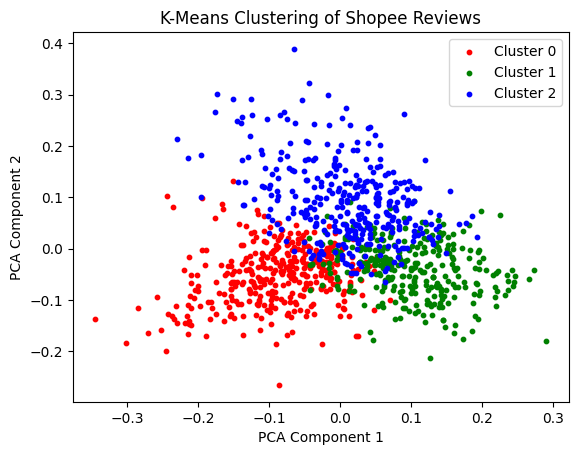

In [ ]:
# 9. Visualisasi cluster
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10,
                color=colors[i % len(colors)],
                label=f'Cluster {i}')

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Shopee Reviews')
plt.show()


In [ ]:
# cluster terbanyak pada cluster 0
import numpy as np
import pandas as pd

# Menghitung jumlah data pada setiap cluster
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()

# Menampilkan jumlah data per cluster
for i, count in cluster_counts.items():
    print(f'Cluster {i}: {count} data')


Cluster 0: 362 data
Cluster 1: 297 data
Cluster 2: 341 data
